In [1]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt



# About Dataset

This dataset contains information on the levels of nitrogen, phosphorus, and potassium in soil, as well as temperature, humidity, pH, and rainfall, and their impact on the growth of crops. The data can be used to make data-driven recommendations for achieving optimal nutrient and environmental conditions to improve crop yield.

# Data fields

- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [3]:

# Load dataset
data = pd.read_csv('Crop_recommendation.csv')

In [4]:
# Display first few rows of the dataset
print(data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [5]:
# Display last few rows of the dataset
print(data.tail())

        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [6]:
# Print the shape of the dataset
print(data.shape)

(2200, 8)


In [7]:
# Calculate the number of duplicated rows in the dataset
data_duplicates = data.duplicated().sum()
print(data_duplicates)

0


In [8]:
# Display the column names of the dataset
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
# Count the number of null values in each column of the dataset
null_counts = data.isnull().sum()
print(null_counts)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [10]:
# Generate descriptive statistics for the dataset
data_description = data.describe()
print(data_description)


                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [11]:
# Display concise summary information about the dataset
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [12]:
# Calculate the number of unique values in each column of the dataset
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [13]:
# Retrieve unique values from the 'label' column
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
# Count the occurrences of each unique value in the 'label' column
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

From above output, it indicates that, each crop label has 100 occurrences, suggesting that the dataset might be well-balanced regarding the distribution of different crop classes, with an equal representation of each crop type. This balance is beneficial for training machine learning models, as it prevents biases toward specific classes during the learning process.


In [15]:
# Drop non-numeric columns (because 'label' is the non-numeric column)
numeric_data = data.drop(columns=['label'])

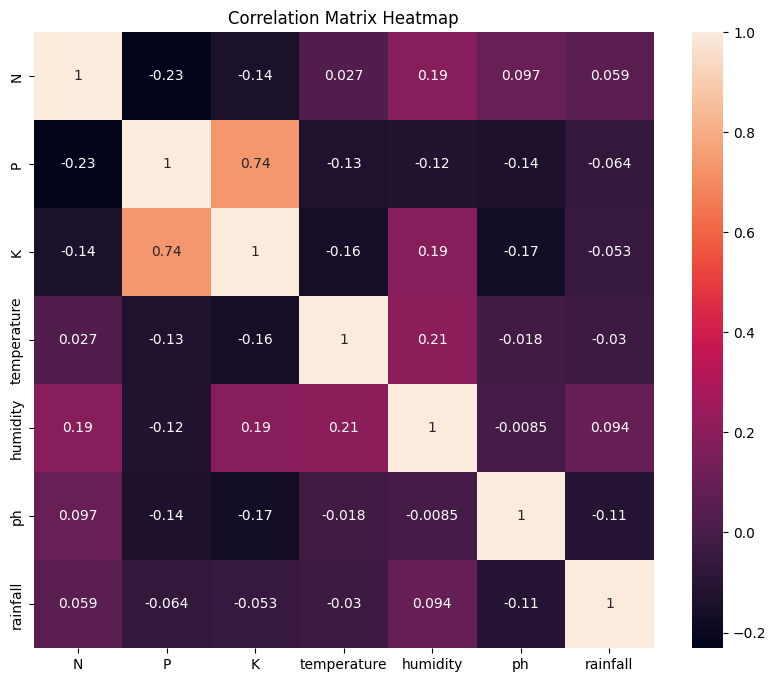

In [33]:
# Create a heatmap to visualize the correlation matrix of the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


From the above matrix correlation heatmap, there is higher correlation between the following:
1. N is highly correlated with humidity with a lesser correlation with P
2. P is highly correlated with K and less correlation with N
3. K, is highly correlated with P and humidity; with a lesser correlation with ph
4. temperature is highly correlated with humidity and less correlated with K
5. humidity is highly correlated with temperature, K and N; and less correlated with P
6. ph has a higher correlation with N and a lesser correlation with K
7. ranfall has a higher correlation with humdity and a very lesser correlation with ph

In [16]:
# Extracting features and target variable
features = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']

In [17]:
# Scale features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)


In [19]:
# Initialize base models with different parameters for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

In [20]:
# Initialize base models
random_forest = RandomForestClassifier(random_state=2)
svm = SVC(kernel='rbf')
gradient_boosting = GradientBoostingClassifier(random_state=2)


In [21]:
# Initialize GridSearchCV for each base model
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5)
grid_search_gb = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gb, cv=5)

In [22]:
# Fit GridSearchCV to find the best hyperparameters for each model
grid_search_rf.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=2),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [23]:
# Get the best estimators from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_
best_svm_model = grid_search_svm.best_estimator_
best_gb_model = grid_search_gb.best_estimator_

In [24]:
# Initialize the StackingClassifier with the best models and meta-estimator
best_base_models = [('RandomForest', best_rf_model), ('SVM', best_svm_model), ('GradientBoosting', best_gb_model)]
best_meta_estimator = LogisticRegression(max_iter=10000)

In [25]:
best_stacking_classifier = StackingClassifier(estimators=best_base_models, final_estimator=best_meta_estimator)


In [26]:
# Train the stacking classifier with the best models
best_stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('RandomForest',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('SVM', SVC(C=10)),
                               ('GradientBoosting',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=2))],
                   final_estimator=LogisticRegression(max_iter=10000))

In [27]:
# Predict using the stacking classifier
y_pred_stacking_best = best_stacking_classifier.predict(X_test)

In [29]:
# Evaluate stacking classifier
accuracy_stacking_best = accuracy_score(y_test, y_pred_stacking_best)
print(f'Stacking Classifier Accuracy after Hyperparameter Tuning: {accuracy_stacking_best:.4f}')

Stacking Classifier Accuracy after Hyperparameter Tuning: 0.9864


There is a high accuracy of 0.9864 which indicates that the model performs well in predicting the labels for the given input data hence the model's predictions align closely with the actual outcomes.



In [30]:
# Classification report
print(classification_report(y_test, y_pred_stacking_best))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      1.00      0.98        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.96      0.96      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    


## From above

Precision - Indicates the proportion of correctly predicted instances among the actual instances for a specific class. For example, for the class 'apple', the precision of 1.00 means that all instances predicted as 'apple' were correct.

Recall (Sensitivity) - Denotes the proportion of actual instances of a class that were correctly predicted by the model. For instance, a recall of 1.00 for 'banana' implies that all true 'banana' instances were predicted accurately.

F1-Score - Harmonic mean of precision and recall. It gives a balance between precision and recall. F1-score of 1.00 suggests perfect precision and recall.

Support - The number of actual occurrences of each class in the test dataset.

Accuracy - The overall accuracy of the model in correctly predicting all classes.

Macro Avg - The average of the metrics (precision, recall, F1-score) calculated independently for each class, without considering class imbalance. It gives each class equal weight.

Weighted Avg - The weighted average of precision, recall, and F1-score calculated by considering the number of instances for each class. It considers class imbalance when computing the average.

Overally, the output indicates high performance for most classes with scores close to or equal to 1.00 for precision, recall, and F1-score. The weighted average accuracy of 0.99 suggests that the model performs very well across all classes on the given test dataset

In [33]:
# Cross-validation score

scores = cross_val_score(best_stacking_classifier, scaled_features, target, cv=5)
print(f'Cross-validation Scores: {scores}')

Cross-validation Scores: [0.98636364 0.98636364 0.99090909 0.99772727 0.98863636]


The results above show a high level of consistency and relatively high accuracy across all folds, ranging from approximately 98.6% to 99.8%. This consistency suggests that the model generalizes well and performs consistently across different subsets of the data, which is a good sign of its robustness.







In [35]:
print(f'Mean Cross-validation Score: {scores.mean()}')
print(f'Variance of Cross-validation Scores: {scores.var()}')


Mean Cross-validation Score: 0.99
Variance of Cross-validation Scores: 1.776859504132229e-05


The results above indicates an impressive mean cross-validation score of approximately 0.99, showcasing strong performance across different folds during cross-validation. Additionally, the variance of the cross-validation scores is exceptionally low, indicating consistent performance across these folds.

In [34]:
# Train the stacking classifier on the entire dataset
best_stacking_classifier.fit(scaled_features, target)

StackingClassifier(estimators=[('RandomForest',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('SVM', SVC(C=10)),
                               ('GradientBoosting',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=2))],
                   final_estimator=LogisticRegression(max_iter=10000))

#  Testing the model part on window GUI

In [36]:
import tkinter as tk
from tkinter import messagebox
import joblib

In [37]:
# Save the trained model
joblib.dump(best_stacking_classifier, 'saved_model.pkl')

['saved_model.pkl']

In [38]:
# Load the trained model
model = joblib.load('saved_model.pkl')

In [39]:
# Create input fields
labels = ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH', 'Rainfall']
entries = []

In [40]:

# Function to get predictions based on user input
def get_prediction():
    try:
        # Get user inputs
        user_input = [float(entry.get()) for entry in entries]

        # Make predictions
        prediction = model.predict([user_input])[0]
        
        # Display prediction
        messagebox.showinfo("Prediction", f"The predicted crop is: {prediction}")

    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values!")

In [41]:
# Create the GUI window
window = tk.Tk()
window.title("Crop Recommendation System")

''

In [42]:
for i, label in enumerate(labels):
    tk.Label(window, text=label).grid(row=i, column=0)
    entry = tk.Entry(window)
    entry.grid(row=i, column=1)
    entries.append(entry)

# Button to trigger predictions
predict_button = tk.Button(window, text="Predict", command=get_prediction)
predict_button.grid(row=len(labels), columnspan=2)

window.mainloop()